In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

In [26]:
data = pd.read_csv('/Users/jmuwsoccer/Documents/Python/CSV/xP.csv')

In [29]:
data['cluster'] = data['cluster'] + 1

In [30]:
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.models import Sequential

In [31]:
data = data.loc[data['Match'] == 'PSU v UCLA']

In [46]:
# Construct Training Data
x_train = []
y_train = []

# For Use Later
team_labels = []

# Find Unique Possessions in pass data
#possessions = set(data['PossessionNumber'])

for p in data:
    possessions = (set(data['PossessionNumber']))
#possessions = set(data['PossessionNumber']) * len(data['PossessionNumber'])
    
# For each possession, create a list of pass clusters inside it

for possession_id in possessions:
    sequence = [[data['cluster'].iloc[possession_id], data['Team'].iloc[possession_id]] for p in data if data['PossessionNumber'].all() == possession_id]

    sequence.append([0, None])
    print(sequence)

    # Create subsequences and trim/pad sequences to five (5) passes
    # TODO Make a graphic for this, since it's confusing
    for i in range(4 if len(sequence) > 5 else len(sequence) - 1):
        adj_seq = []
        target = sequence[i+1][0]

        for j in range(0,4):
            adj_seq.append(sequence[j][0] if j <= i else 0)
        adj_seq.append(0)

        x_train.append(np.array(adj_seq).reshape(5,1))

        # One-hot encoding for target classification
        y_train.append([1 if k == target else 0 for k in range(0,71)])

        team_labels.append(sequence[i + 1][1])

[[61, 'Penn State Nittany Lions'], [61, 'Penn State Nittany Lions'], [61, 'Penn State Nittany Lions'], [61, 'Penn State Nittany Lions'], [61, 'Penn State Nittany Lions'], [61, 'Penn State Nittany Lions'], [61, 'Penn State Nittany Lions'], [61, 'Penn State Nittany Lions'], [61, 'Penn State Nittany Lions'], [61, 'Penn State Nittany Lions'], [61, 'Penn State Nittany Lions'], [61, 'Penn State Nittany Lions'], [61, 'Penn State Nittany Lions'], [61, 'Penn State Nittany Lions'], [61, 'Penn State Nittany Lions'], [61, 'Penn State Nittany Lions'], [61, 'Penn State Nittany Lions'], [61, 'Penn State Nittany Lions'], [61, 'Penn State Nittany Lions'], [61, 'Penn State Nittany Lions'], [61, 'Penn State Nittany Lions'], [61, 'Penn State Nittany Lions'], [61, 'Penn State Nittany Lions'], [61, 'Penn State Nittany Lions'], [61, 'Penn State Nittany Lions'], [61, 'Penn State Nittany Lions'], [61, 'Penn State Nittany Lions'], [61, 'Penn State Nittany Lions'], [61, 'Penn State Nittany Lions'], [0, None]]
[[

In [9]:
print(x_train)

[]


In [10]:
print(y_train)

[]


In [17]:
print(len(y_train))

19227


In [18]:
# Build Sequential Neural Network
model = Sequential()

# Add LSTM to Model
model.add(LSTM(200, input_shape=(5,1)))

# The Final Layer has a shape equal to the number of clusters
model.add(Dense(71, activation='softmax'))

# Compile using loss of Categorical Crossentropy
model.compile(loss='categorical_crossentropy', optimizer='adam')

W0708 13:44:41.889246 4561872320 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0708 13:44:41.902855 4561872320 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0708 13:44:41.904920 4561872320 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0708 13:44:42.103112 4561872320 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0708 13:44:42.122052 4561872320 deprecation_wrapper.py:119] From /anaconda3

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 200)               161600    
_________________________________________________________________
dense_1 (Dense)              (None, 71)                14271     
Total params: 175,871
Trainable params: 175,871
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Fit the model
# Takes ~8 minutes on my 4-year-old Macbook Pro
model.fit([x_train], [y_train], epochs=71, batch_size=71, verbose=1)

Epoch 1/71
19227/19227 [==============================] - 3s 156us/step - loss: 1.0766
Epoch 2/71
19227/19227 [==============================] - 3s 162us/step - loss: 0.9283
Epoch 3/71
19227/19227 [==============================] - 3s 169us/step - loss: 0.8131
Epoch 4/71
19227/19227 [==============================] - 3s 166us/step - loss: 0.7518
Epoch 5/71
19227/19227 [==============================] - 3s 165us/step - loss: 0.6940
Epoch 6/71
19227/19227 [==============================] - 3s 172us/step - loss: 0.6383
Epoch 7/71
19227/19227 [==============================] - 3s 166us/step - loss: 0.6110
Epoch 8/71
19227/19227 [==============================] - 3s 178us/step - loss: 0.6289
Epoch 9/71
19227/19227 [==============================] - 3s 179us/step - loss: 0.5882
Epoch 10/71
19227/19227 [==============================] - 4s 192us/step - loss: 0.4990
Epoch 11/71
19227/19227 [==============================] - 4s 186us/step - loss: 0.5817
Epoch 12/71
19227/19227 [================

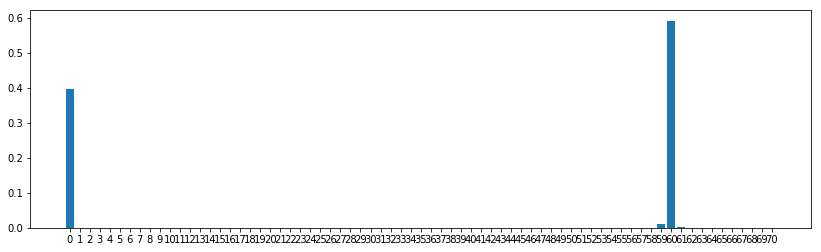

In [23]:
# Make Prediction on sequence
sequence = [60,0,0,0,0]
predictions = model.predict([[np.array(sequence).reshape(5,1)]])[0]

plt.figure(figsize=(14,4))
plt.bar(range(0,71), predictions, tick_label=[str(i) for i in range(71)])
plt.show()

# This makes intuitive sense when you look back at pass cluster map.

In [236]:
# Plot Possession Sequence, and Likely Next Passes

for i, (x, end_x, y, end_y) in enumerate([cluster_model.cluster_centers_[i-1] for i in sequence if i > 0]):    
    
    plt.arrow(x, y, end_x-x, end_y-y,
              head_width=2,
              head_length=2,
              color='black',
              length_includes_head=True)
    
    plt.text((x+end_x)/2, (y+end_y)/2, str(i+1))
    
for i, (x, end_x, y, end_y) in enumerate(cluster_model.cluster_centers_):
    
    if predictions[i+1] > 0.1:    
        plt.arrow(x, y, end_x-x, end_y-y,
                  head_width=2,
                  head_length=2,
                  color='red',
                  alpha=0.5,
                  length_includes_head=True)
plt.xlim(0,120)
plt.ylim(0,80)
plt.show()

NameError: name 'cluster_model' is not defined